# **Задача классификации¶**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, Normalizer, normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

### Дз к 09.11.23¶

# 0. Описание задачи¶

Ключом к успеху в любой организации является привлечение и удержание лучших специалистов. Одной из ключевых задач HR-аналитика является определение того, какие факторы удерживают сотрудников в компании, а какие побуждают уйти. Датасет содержит набор данных о сотрудниках, которые либо в настоящее время работают в компании, либо уволились. Цель состоит в том, чтобы выявить, опираясь на эти факторы, останется ли сотрудник в компаниии.

## 1. Загрузка данных¶

In [2]:
url = "https://raw.githubusercontent.com/SamoilukAA/Machine-learning/main/employee_attrition_train.csv"
dt = pd.read_csv(url)

Первые и последние значения данных из таблицы:

In [3]:
dt.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [4]:
dt.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,...,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,...,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,...,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3
1028,50.0,No,Travel_Rarely,264.0,Sales,9.0,3,Marketing,1,1591,...,3,80,1,27,2,3,1,0,0,0


Информация о датасете:

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

Количество объектов, количество и имена признаков у каждого объекта:

In [6]:
print(dt.shape)
print(dt.columns)

(1029, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


Информация об атрибутах:

*   Age - Возраст сотрудника
*   Attrition - Сотрудник покинул компанию (0=No, 1=Yes)
*   BusinessTravel - (1='No Travel', 2='Travel Frequently', 3='Travel Rarely')
*   DailyRate - Дневной доход
*   Department - (1=HR, 2=R&D, 3=Sales)
*   DistanceFromHome - Расстояние от дома до места работы
*   Education - (1='Below College', 2='College', 3='Bachelor', 4='Master', 5='Doctor')
*   EducationField - (1=HR, 2=Life Sciences, 3=Marketing, 4=Medical Sciences, 5=Others, 6= Technical)
*   EmployeeCount - Количество сотрудников
*   EmployeeNumber - ID сотрудника
*   EnvironmentSatisfaction - Удовлетворенность обстановкой
*   Gender - Пол сотрудника (1=Female, 2=Male)
*   HourlyRate - Почасовая оплата
*   JobInvolvement - Вовлеченность в работу (1='Low', 2='Medium', 3='High', 4='Very High')
*   JobLevel - Уровень работы
*   JobRole - Должность (1=HR Rep, 2=HR, 3=Lab Technician, 4=Manager, 5=Managing Director, 6=Research Director, 7=Research Scientist, 8=Sales Executive, 9=Sales Representative)
*   JobSatisfaction - Удовлетворенность работой (1='Low', 2='Medium', 3='High', 4='Very High')
*   MaritalStatus - Семейное положение (1=Divorced, 2=Married, 3=Single)
*   MonthlyIncome - Зарплата за месяц
*   MonthlyRate - Месячный доход
*   NumCompaniesWorked - Количество мест работы
*   Over18 - Совершеннолетний сотрудник (1=Yes, 2=No)
*   OverTime - Лишние отработанные часы (1=No, 2=Yes)
*   PercentSalaryHike - Повышение зарплаты в процентах
*   PerformanceRating - Рейтинг производительности
*   RelationshipSatisfaction - Удовлетворенность отношениями с коллегами
*   StandardHours - Норма времени
*   StockOptionLevel - Опцион на покупку акций компании (чем выше значение, тем больше у сотрудника прав)
*   TotalWorkingYears - Стаж работы
*   TrainingTimesLastYear - Часы, затраченные на обучение
*   WorkLifeBalance - Время, проведенное вне работы
*   YearsAtCompany - Количество лет в данной компании
*   YearsInCurrentRole - Количество лет на данной должности
*   YearsSinceLastPromotion - Количесвто лет, прошедших с последнего повышения по службе
*   YearsWithCurrManager - Количество лет, отработанных под руководством текущего руководителя

Категориальные признаки: BusinessTravel, Department, Education, EducationField, EmployeeNumber, Gender, JobInvolvement, JobRole, JobSatisfaction, MaritalStatus.

Количественные признаки: Age, DailyRate, DistanceFromHome, EmployeeCount, EnvironmentSatisfaction, HourlyRate, JobLevel, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.

Бинарные признаки: Attrition, Over18, OverTime - отнесем их к категориальным.

Для категориальных признаков изменим тип с числовых типов и типа object на тип category:

In [7]:
dt['BusinessTravel'] = dt['BusinessTravel'].astype('category')
dt['Department'] = dt['Department'].astype('category')
dt['EducationField'] = dt['EducationField'].astype('category')
dt['Gender'] = dt['Gender'].astype('category')
dt['MaritalStatus'] = dt['MaritalStatus'].astype('category')
dt['JobRole'] = dt['JobRole'].astype('category')
dt['Attrition'] = dt['Attrition'].astype('category')
dt['Over18'] = dt['Over18'].astype('category')
dt['OverTime'] = dt['OverTime'].astype('category')

Проверим тип категориальных признаков:

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       893 non-null    float64 
 1   Attrition                 1029 non-null   category
 2   BusinessTravel            1024 non-null   category
 3   DailyRate                 1002 non-null   float64 
 4   Department                1029 non-null   category
 5   DistanceFromHome          934 non-null    float64 
 6   Education                 1029 non-null   int64   
 7   EducationField            1029 non-null   category
 8   EmployeeCount             1029 non-null   int64   
 9   EmployeeNumber            1029 non-null   int64   
 10  EnvironmentSatisfaction   1029 non-null   int64   
 11  Gender                    1029 non-null   category
 12  HourlyRate                1029 non-null   int64   
 13  JobInvolvement            1029 non-null   int64 

# 2. Визуализация данных и вычисление основных характеристик¶

Диаграммы рассеивания для части количественных признаков:

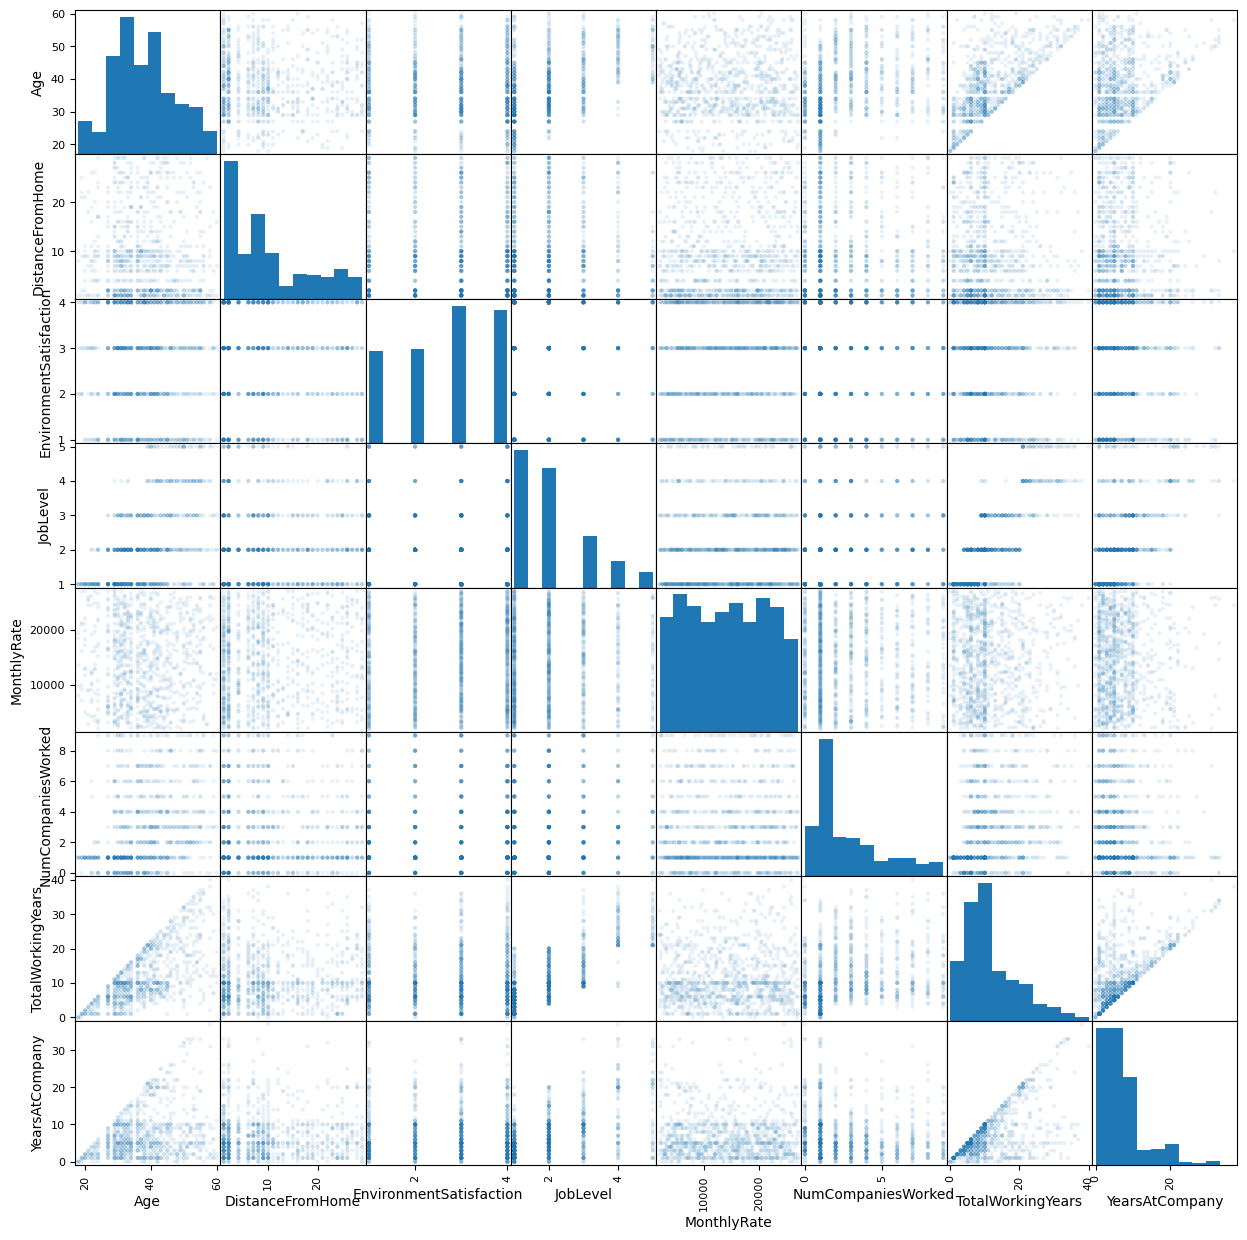

In [9]:
df = dt[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobLevel', 'MonthlyRate', 'NumCompaniesWorked',
         'TotalWorkingYears', 'YearsAtCompany']].copy()
pd.plotting.scatter_matrix(df, figsize = (15, 15), alpha = 0.1)
pass

Соотношение людей, ушедших из компании, и оставшихся:

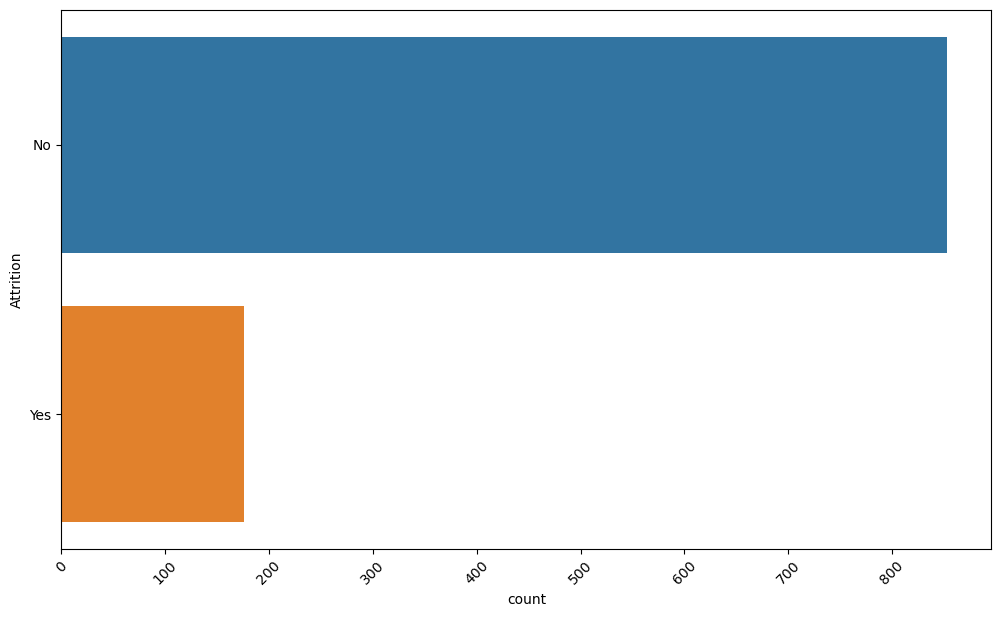

In [10]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.countplot(y=dt['Attrition'])
plt.xticks(rotation=45)
plt.show()

Из гистограммы видно, что классы несбалансированы. Их точное соотношение:

In [11]:
dt['Attrition'].value_counts()

Attrition
No     853
Yes    176
Name: count, dtype: int64

Сотрудники, оставшиеся в компании:

In [12]:
dt['Attrition'].value_counts()[0] / (dt['Attrition'].value_counts()[0] + dt['Attrition'].value_counts()[1]) * 100

82.89601554907678

Сотрудники, покинувшие компанию:

In [13]:
dt['Attrition'].value_counts()[1] / (dt['Attrition'].value_counts()[0] + dt['Attrition'].value_counts()[1]) * 100

17.103984450923228

Вычислим основные статистические характеристики:

*   mean - среднее значение
*   std - стандартное отклонение
*   min - минимум
*   25% - нижнее значение первого квантиля
*   50% - медиана
*   75% - верхнее значение первого квантиля
*   max - максимум

In [14]:
dt.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,...,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,...,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Матрица корреляции для количественных признаков:

In [15]:
df = dt.drop(['EmployeeCount', 'StandardHours'], axis= 1)
corr_mat = df.corr(numeric_only=True)
corr_mat

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.023845,-0.036895,0.226646,-0.014892,-0.024051,0.019754,0.024176,0.506348,0.007670,...,0.007457,0.062533,0.023282,0.676650,-0.026077,-0.042949,0.291798,0.218028,0.178679,0.186070
DailyRate,0.023845,1.000000,-0.018783,-0.056701,-0.054757,-0.001438,0.028555,0.047225,0.021386,0.022260,...,0.018240,0.029849,0.049149,0.007548,0.022518,-0.053567,-0.041877,-0.019262,-0.049283,-0.056317
DistanceFromHome,-0.036895,-0.018783,1.000000,0.005009,0.041360,-0.041260,-0.007381,0.026350,0.002220,0.015920,...,0.041723,0.014434,0.018559,-0.005680,-0.040232,-0.020954,-0.002579,0.003508,-0.024982,0.017107
Education,0.226646,-0.056701,0.005009,1.000000,0.058632,-0.032129,0.012786,0.049639,0.093952,0.001742,...,-0.025992,-0.005492,0.025609,0.159551,-0.041845,0.018620,0.070545,0.087055,0.057998,0.083523
EmployeeNumber,-0.014892,-0.054757,0.041360,0.058632,1.000000,0.017413,0.032326,0.004476,-0.036151,-0.043173,...,-0.054376,-0.059879,0.041590,-0.018604,0.009204,0.012589,-0.009828,-0.018311,-0.025772,-0.006427
EnvironmentSatisfaction,-0.024051,-0.001438,-0.041260,-0.032129,0.017413,1.000000,-0.038216,-0.015561,-0.005345,-0.045906,...,0.002318,-0.016510,0.006108,-0.002371,-0.004123,0.025369,0.015683,0.019474,0.035938,-0.009592
HourlyRate,0.019754,0.028555,-0.007381,0.012786,0.032326,-0.038216,1.000000,0.043600,-0.047287,-0.091423,...,-0.002279,-0.015076,0.021483,-0.015391,-0.001245,-0.008096,-0.036649,-0.027986,-0.058669,-0.029499
JobInvolvement,0.024176,0.047225,0.026350,0.049639,0.004476,-0.015561,0.043600,1.000000,-0.002570,-0.013561,...,-0.044825,0.038824,0.032162,0.008527,-0.009838,-0.022104,-0.009461,0.014094,-0.039542,0.049666
JobLevel,0.506348,0.021386,0.002220,0.093952,-0.036151,-0.005345,-0.047287,-0.002570,1.000000,-0.011140,...,-0.007530,0.021739,-0.006955,0.786130,-0.001493,0.051527,0.544920,0.418767,0.350313,0.365449
JobSatisfaction,0.007670,0.022260,0.015920,0.001742,-0.043173,-0.045906,-0.091423,-0.013561,-0.011140,1.000000,...,0.007691,-0.006388,0.007461,-0.020868,0.003154,-0.041340,-0.005842,0.005784,-0.016437,-0.017440


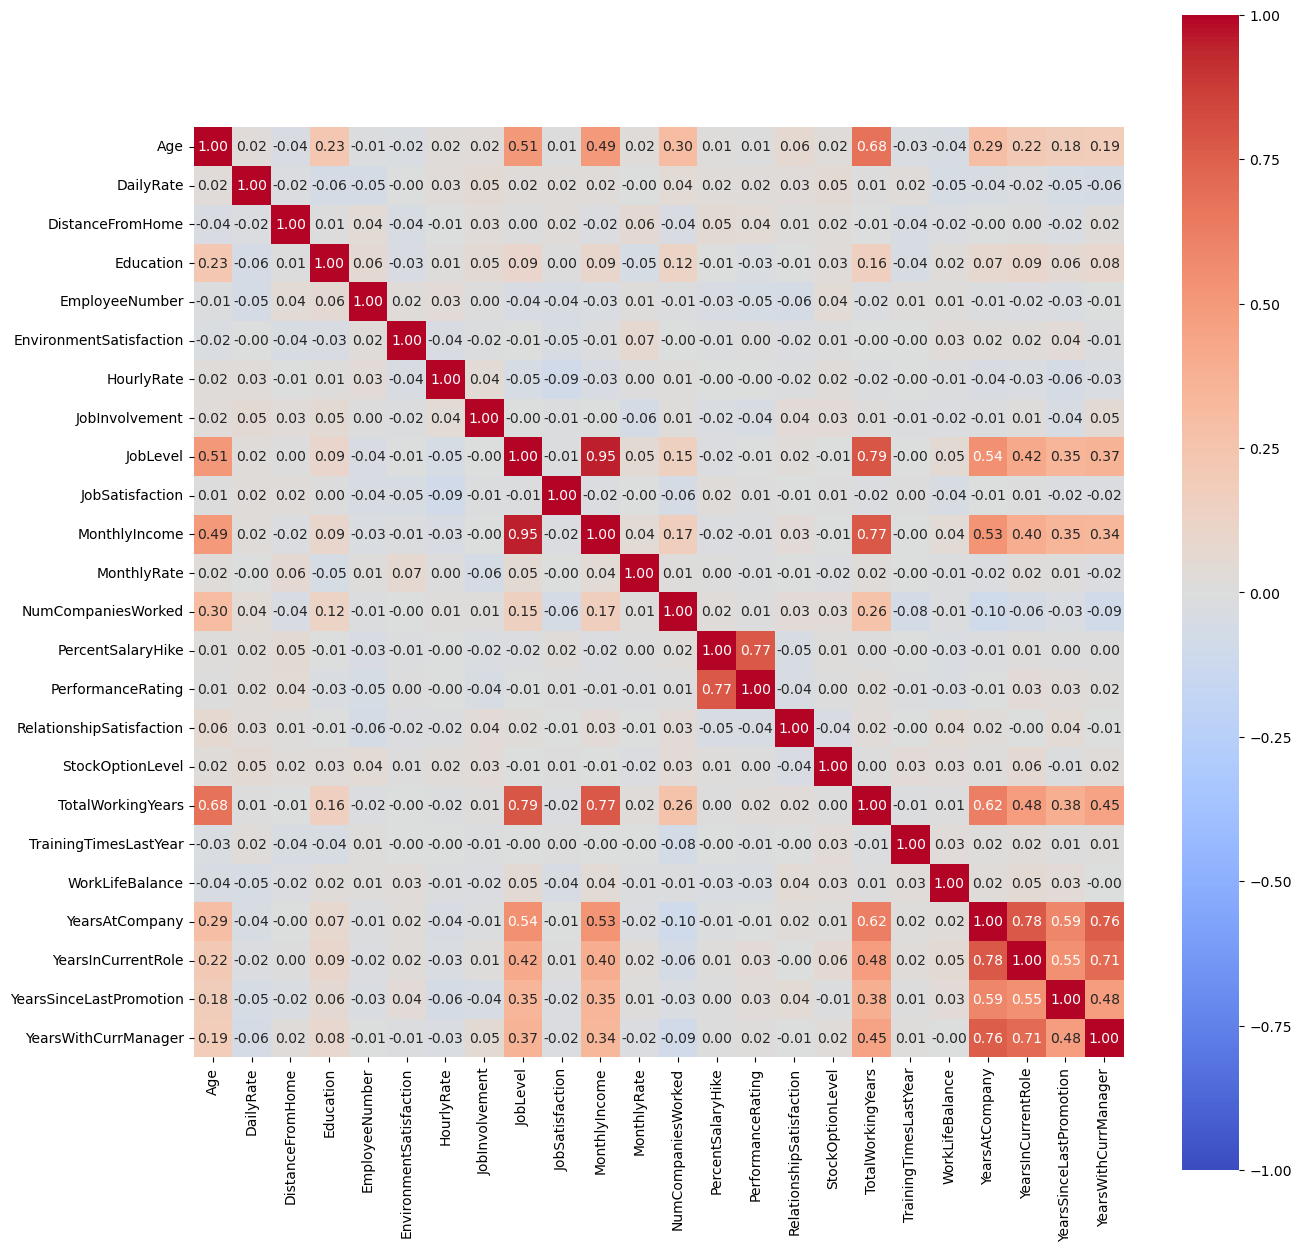

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Вывод: присутствует корреляция между количественными признаками.

## 3. Обработка пропущенных значений¶

Text(0.5, 102.72222222222219, 'Missing Values')

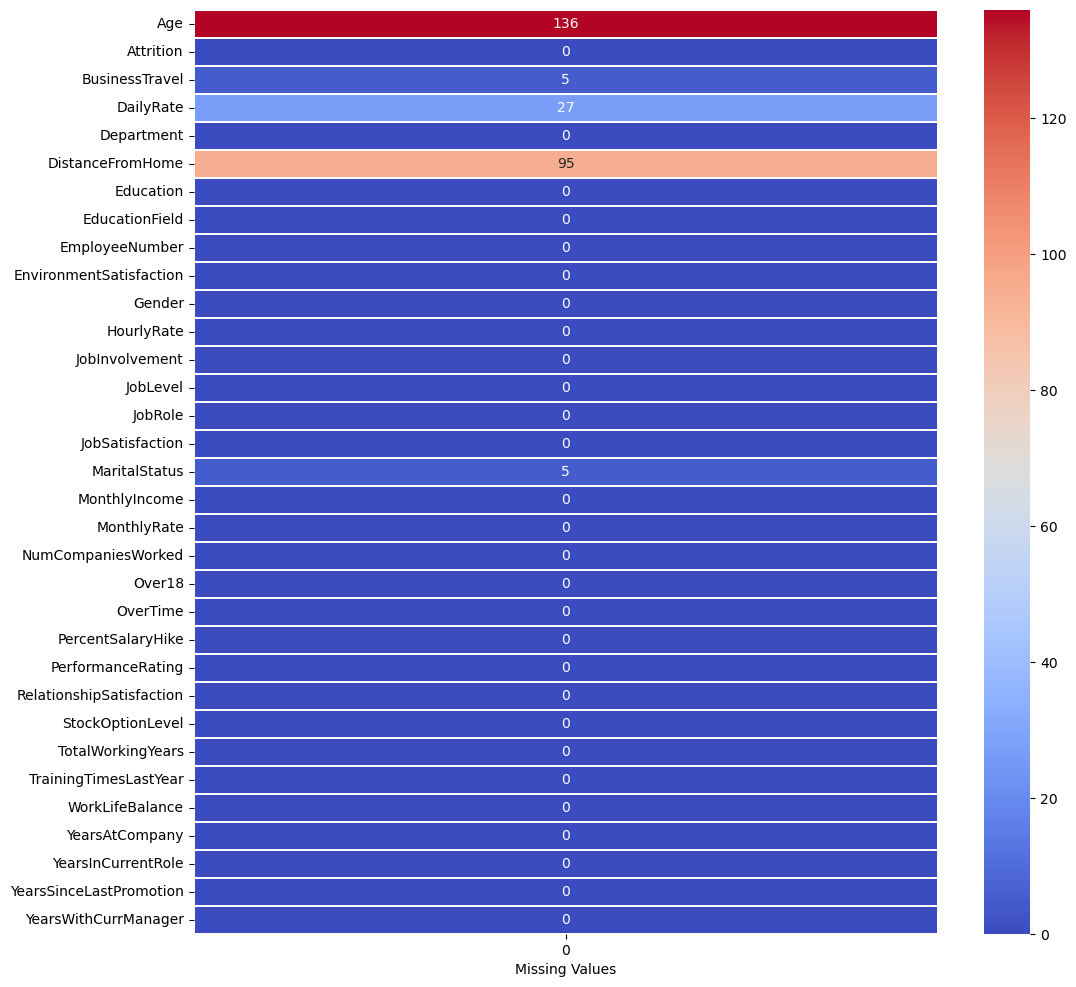

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(df.isna().sum().to_frame(), linewidths= 0.3, annot=True, fmt='d',cmap='coolwarm')
ax.set_xlabel("Missing Values")

In [18]:
imputer_cols = ['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'MaritalStatus']
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df[imputer_cols])
df[imputer_cols] = imputer.transform(df[imputer_cols])

Text(0.5, 102.72222222222219, 'Missing Values')

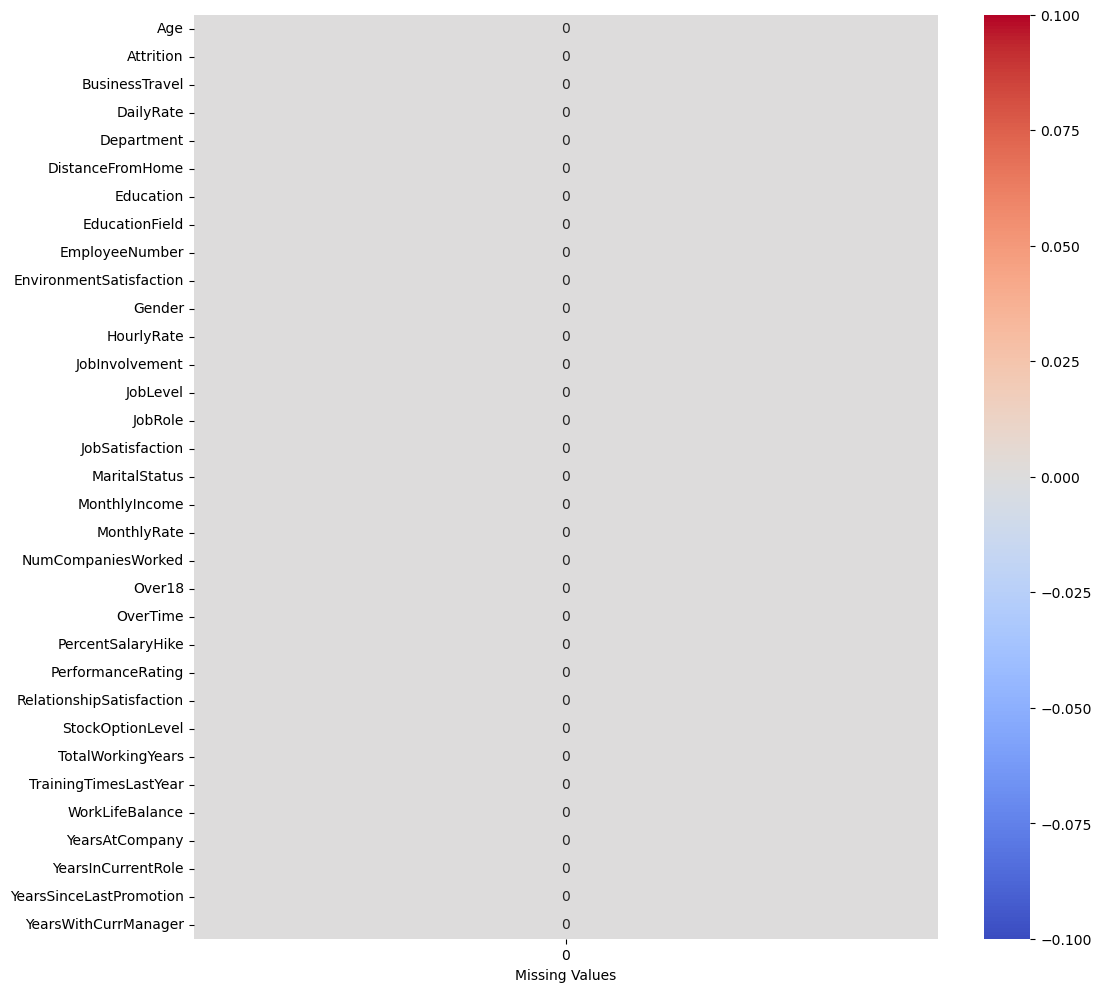

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d',cmap='coolwarm')
ax.set_xlabel("Missing Values")

## 4. Обработка категориальных признаков.¶

In [20]:
df['BusinessTravel'] = dt['BusinessTravel'].replace(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], [1, 2, 3])
df['Department'] = dt['Department'].replace(['Human Resources', 'Research & Development', 'Sales'], [1, 2, 3])
df['EducationField'] = dt['EducationField'].replace(['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
                                             'Technical Degree'], [1, 2, 3, 4, 5, 6])
df['Gender'] = dt['Gender'].replace(['Female', 'Male'], [1, 2])
df['JobRole'] = dt['JobRole'].replace(['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager',
                                       'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive',
                                       'Sales Representative'], [1, 2, 3, 4, 5, 6, 7, 8, 9])
df['MaritalStatus'] = dt['MaritalStatus'].replace(['Divorced', 'Married', 'Single'], [1, 2, 3])
df['Attrition'] = dt['Attrition'].replace(['No', 'Yes'], [0, 1])
df['Over18'] = dt['Over18'].replace(['Y', 'N'], [1, 2])
df['OverTime'] = dt['OverTime'].replace(['No', 'Yes'], [1, 2])

In [21]:
bt_cols = [171, 255, 260, 333, 339]
for i in bt_cols:
    df['BusinessTravel'][i] = 3
ms_cols = [10, 89, 105, 107, 150]
for i in ms_cols:
    df['MaritalStatus'][i] = 2

In [22]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,3,1126.0,2,1.0,2,4,997,4,...,4,3,1,32,1,2,5,4,1,3
1,36.0,0,3,216.0,2,6.0,2,4,178,2,...,4,4,2,7,0,3,3,2,0,1
2,21.0,1,3,337.0,3,7.0,1,3,1780,2,...,3,2,0,1,3,3,1,0,1,0
3,50.0,0,2,1246.0,1,1.0,3,4,644,1,...,3,3,1,32,2,3,32,5,10,7
4,52.0,0,3,994.0,2,7.0,4,2,1118,2,...,3,4,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,29.0,0,3,750.0,2,28.0,3,2,1596,2,...,3,4,2,10,3,2,10,9,6,8
1025,41.0,0,3,447.0,2,1.0,3,2,1814,2,...,3,1,0,11,3,1,3,2,1,2
1026,22.0,1,2,1256.0,2,1.0,4,2,1203,3,...,3,2,1,1,5,3,0,0,0,0
1027,29.0,0,3,1378.0,2,13.0,2,5,2053,4,...,3,1,1,10,2,3,4,3,0,3


## 5. Проведение нормализации¶

In [23]:
numerical_v = ["DailyRate", "DistanceFromHome", "EnvironmentSatisfaction", "HourlyRate", "JobLevel",
              "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating",
              "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
              "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
for i in df:
    if i in numerical_v:
        df[i] = (df[i]-df[i].mean())/df[i].std()

In [24]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,3,0.82295,2,-0.961579,2,4,997,1.200563,...,2.295488,0.287641,0.203327,2.647595,-1.388742,-1.073173,-0.320132,-0.058969,-0.360135,-0.285539
1,36.0,0,3,-1.357804,2,-0.368446,2,4,178,-0.622875,...,2.295488,1.215485,1.346626,-0.534046,-2.167921,0.360976,-0.649712,-0.605627,-0.681818,-0.853305
2,21.0,1,3,-1.067836,3,-0.249819,1,3,1780,-0.622875,...,-0.435214,-0.640203,-0.939971,-1.297639,0.169617,0.360976,-0.979293,-1.152285,-0.360135,-1.137189
3,50.0,0,2,1.110522,1,-0.961579,3,4,644,-1.534594,...,-0.435214,0.287641,0.203327,2.647595,-0.609562,0.360976,4.129204,0.214360,2.535011,0.849995
4,52.0,0,3,0.506621,2,-0.249819,4,2,1118,-0.622875,...,-0.435214,1.215485,-0.939971,0.865876,0.948797,0.360976,0.174239,0.487689,0.604914,-1.137189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,29.0,0,3,-0.078109,2,2.24134,3,2,1596,-0.622875,...,-0.435214,1.215485,1.346626,-0.152249,0.169617,-1.073173,0.503819,1.307676,1.248280,1.133878
1025,41.0,0,3,-0.804228,2,-0.961579,3,2,1814,-0.622875,...,-0.435214,-1.568047,-0.939971,-0.024983,0.169617,-2.507322,-0.649712,-0.605627,-0.360135,-0.569422
1026,22.0,1,2,1.134486,2,-0.961579,4,2,1203,0.288844,...,-0.435214,-0.640203,0.203327,-1.297639,1.727976,0.360976,-1.144083,-1.152285,-0.681818,-1.137189
1027,29.0,0,3,1.426851,2,0.461941,2,5,2053,1.200563,...,-0.435214,-1.568047,0.203327,-0.152249,-0.609562,0.360976,-0.484922,-0.332298,-0.681818,-0.285539


## 6. Разбиение данных на обучающую и тестовую выборки¶

In [25]:
df['Attrition'].value_counts()

Attrition
0    853
1    176
Name: count, dtype: int64

In [26]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

Разобьем данные на обучающую и тестовую выборки:

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size = 0.25, random_state = 42)

n_train, _ = x_train.shape
n_test,  _ = x_test.shape

n_train, n_test

(771, 258)

## 7. Классификатор ближайших соседей¶

In [28]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("The training accuracy for KNN is:", round(knn.score(x_train, y_train)*100, 2), "%")
print("The testing accuracy for KNN is:", round(knn_acc * 100,2), "%")

The training accuracy for KNN is: 83.79 %
The testing accuracy for KNN is: 80.62 %


### Подбор оптимального значения количества ближайших соседей¶

In [29]:
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.17249417249417243 10


Оптимальное число соседей: 10

Ошибка на обучающей выборке: 0.17249417249417243

## 8. Вычисление ошибок на обучающей и тестовой выборках.¶

In [30]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(x_train, y_train)

err_train = np.mean(y_train != knn.predict(x_train))
err_test  = np.mean(y_test  != knn.predict(x_test))

print(err_train, err_test)

0.17250324254215305 0.17054263565891473


Ошибка на обучающей выборке: 0.17250324254215305

Ошибка на тестовой выборке: 0.17054263565891473

Ошибки на тестовой и на обучающей выборках примерно одинаковые.

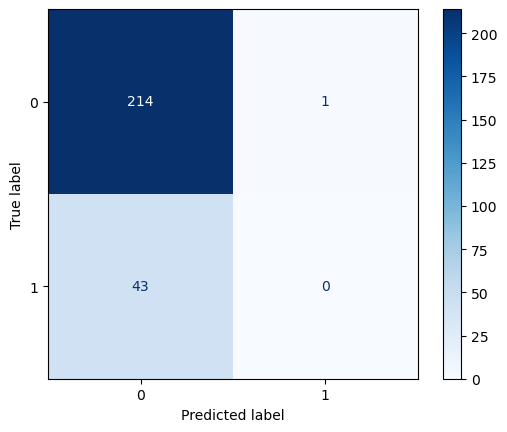

In [31]:
ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, cmap=plt.cm.Blues)
pass

## 9. Классификатор RANDOM FOREST¶

In [32]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
print("The training accuracy for Random Forest is:", round(rfc.score(x_train, y_train)*100,2), "%")
print("The testing accuracy for Random Forest is:", round(rfc_acc * 100,2), "%")

The training accuracy for Random Forest is: 100.0 %
The testing accuracy for Random Forest is: 86.43 %


In [33]:
rfc = RandomForestClassifier().fit(x_train, y_train)

err_train = np.mean(y_train != rfc.predict(x_train))
err_test  = np.mean(y_test  != rfc.predict(x_test))

print(err_train, err_test)

0.0 0.12790697674418605


Ошибка на обучающей выборке: 0.0

Ошибка на тестовой выборке: 0.12790697674418605

Метод RANDOM FOREST показал отсутсвие ошибки на обучающей выборке.

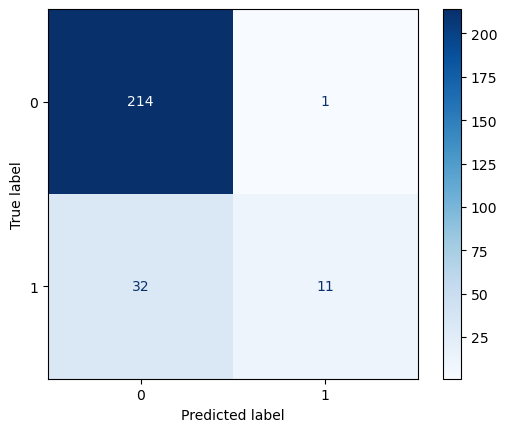

In [38]:
ConfusionMatrixDisplay.from_estimator(rfc, x_test, y_test, cmap=plt.cm.Blues)
pass

# 10. Выводы¶

Датасет имеет несбалансированные классы: 83/17 - сотрудники, оставшиеся в компании/сотрудники, покинувшие место работы.

Классификатор ближайших соседей был запущен при разных значениях параметра k - числа соседей с целью определить оптимальный. Оптимальное число соседей: 10. Ошибка на тестовой выборке при этом параметре: 0.17054263565891473, причем большая часть ошибок вида - false negative (людей, которые покинули компанию, относят к тем, кто остался).

Также был запущен метод Random forest, выдавший ошибку 0.13565891472868216 на тестовой выборке. Ошибка получилась немного меньше, чем при запуске классификатора ближайших соседей, а так же удалось немного сократить количество ошибок, следовательно метод Random forest более подходящий для данной задачи.

### ДЗ к 28.12.23¶

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

# 1. Логистическая регрессия

In [40]:
lr = LogisticRegression(solver="lbfgs", max_iter=10000)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("The training accuracy for Logistic Regression is:", round(lr.score(x_train, y_train)*100,2), "%")
print("The testing accuracy for Logistic Regression is:", round(lr_acc * 100,2), "%")

The training accuracy for Logistic Regression is: 87.29 %
The testing accuracy for Logistic Regression is: 87.21 %


In [41]:
lr = LogisticRegression(solver="lbfgs", max_iter=10000).fit(x_train, y_train)

err_train = np.mean(y_train != lr.predict(x_train))
err_test  = np.mean(y_test  != lr.predict(x_test))

print(err_train, err_test)

0.12710765239948119 0.12790697674418605


Ошибка на обучающей выборке: 0.12710765239948119

Ошибка на тестовой выборке: 0.12790697674418605

Ошибкa на обучающей выборке немного меньше, чем на тестовой.

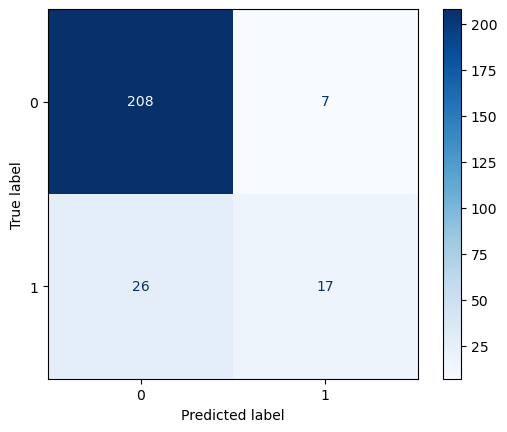

In [42]:
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test, cmap=plt.cm.Blues)
pass

Логистическая регрессия показала меньшее значение ошибки по сравнению с классификатором ближайших соседедей.

## 2. RANDOM FOREST

In [43]:
hidden_layer = np.arange(1, 30)
depth = np.arange(1, 30)
test_err = []
train_err = []
for d in depth:
    rd_forest_model = RandomForestClassifier(max_depth = d)
    rd_forest_model.fit(x_train, y_train)

    Y_train_pred = rd_forest_model.predict(x_train)
    Y_test_pred = rd_forest_model.predict(x_test)
    train_err.append(np.mean(y_train != Y_train_pred))
    test_err.append(np.mean(y_test != Y_test_pred))

График зависимости ошибки от количества нейронов:

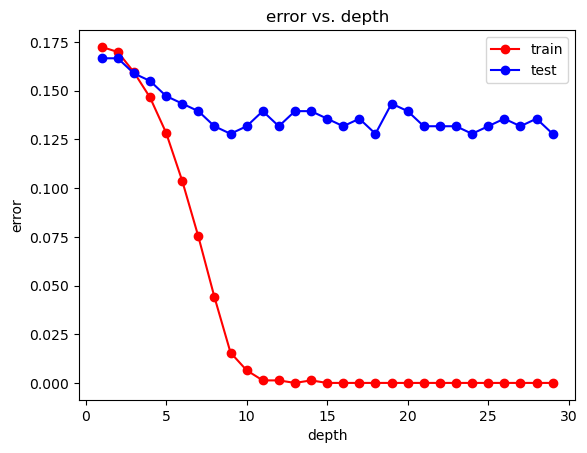

In [44]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('error vs. depth')
plt.xlabel('depth')
plt.ylabel('error')
plt.legend()

Минимальная ошибка на обучающей и тестовой выборках:

In [45]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.12790697674418605


Максимальная глубина дерева, когда достигается наименьшая ошибка:

In [46]:
opt_dep = depth[test_err == min_test_err]
print(opt_dep)

[ 9 18 24 29]


Для лучшего значения ошибки на тестовой выборке построим матрицу рассогласования.

In [47]:
rd_forest_model = RandomForestClassifier(max_depth = 29)
rd_forest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=29)

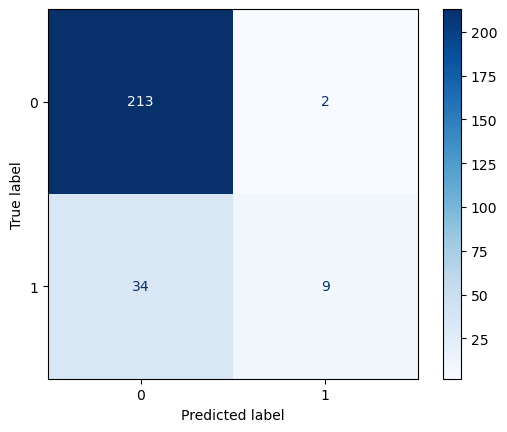

In [48]:
ConfusionMatrixDisplay.from_estimator(rd_forest_model, x_test, y_test, cmap=plt.cm.Blues)

По сравнению с логистической регрессией количество true positive возросло, но при этом также увеличилось false positive.

# 2. Полносвязная нейронная сеть c 1-м скрытым слоем

In [49]:
hidden_layer = np.arange(1, 30)
test_err = []
train_err = []
for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neu, ), random_state = 42, max_iter = 10000)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train[0:1])
    y_test_pred = mlp_model.predict(x_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

TypeError: ufunc 'expit' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Возникает ошибка, которую непонятно как исправить...

# Общие выводы

Ошибки на тестовых выборках у рассмотренных классификаторах:

*   KNN - 0.17054263565891473
*   Logistic Regression - 0.12790697674418605
*   Random Forest - 0.12790697674418605


У логистической регрессии и классификатора Random Forest наблюдаются совпадения в значениях ошибки на тестовой выборке, но эта ошибка меньше, чем у классификатора ближайших соседей.

Сравним матрицы рассогласования:

Text(0.5, 1.0, 'Random Forest')

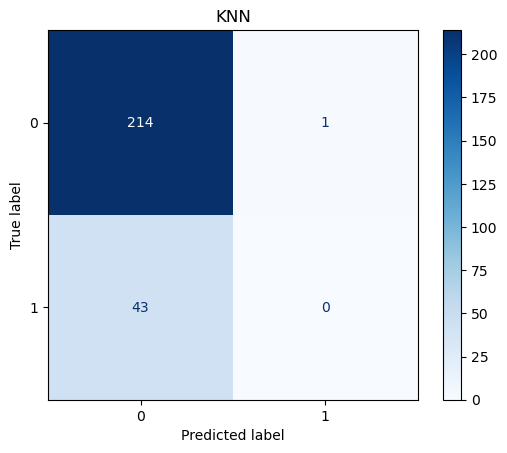

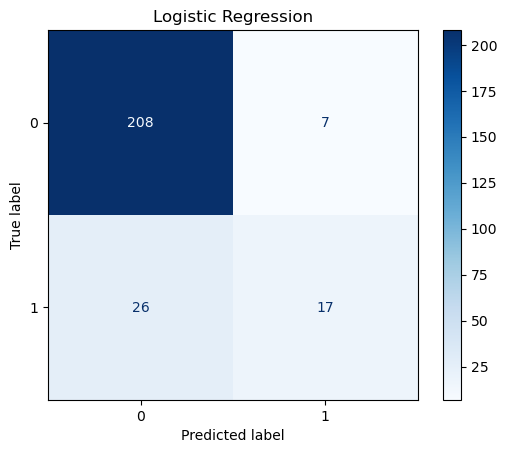

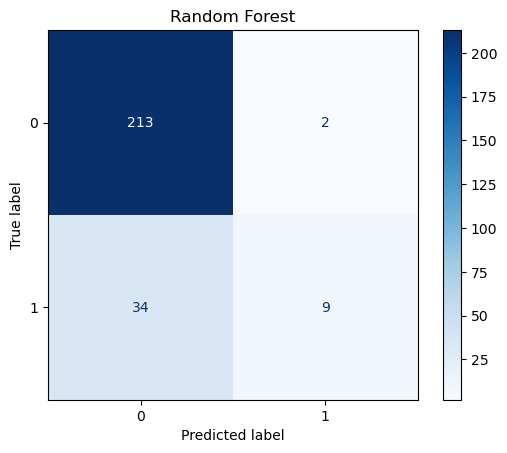

In [53]:
disp1 = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title("KNN")

disp2 = ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test, cmap=plt.cm.Blues)
disp2.ax_.set_title("Logistic Regression")

disp3 = ConfusionMatrixDisplay.from_estimator(rd_forest_model, x_test, y_test, cmap=plt.cm.Blues)
disp3.ax_.set_title("Random Forest")

Логистическая регрессия допускает меньше ошибок при предсказании останется ли сотрудник в компании или же покинет ее.